# Goal:
**Gain insights into the differences between the wells in terms of production performance and to provide recommendations to improve the production performance of the wells.**

# Problem Statement:

**1. Identify the key factors that affect the production performance of the wells.**

**2. Identify the wells with significant production and those that are at risk of becoming dry.**

**3. Learn how the wells differ in their production performance so that you can provide suggestions to enhance the wells production performance.**



In [333]:
#importing all the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix





In [334]:
#importing the dataset

df = pd.read_excel("Volve production data.xlsx")
print(df.head())

     DATEPRD WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0 2014-04-07  NO 15/9-F-1 C                7405         15/9-F-1 C   
1 2014-04-08  NO 15/9-F-1 C                7405         15/9-F-1 C   
2 2014-04-09  NO 15/9-F-1 C                7405         15/9-F-1 C   
3 2014-04-10  NO 15/9-F-1 C                7405         15/9-F-1 C   
4 2014-04-11  NO 15/9-F-1 C                7405         15/9-F-1 C   

   NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0         3420717          VOLVE             369304    MÆRSK INSPIRER   
1         3420717          VOLVE             369304    MÆRSK INSPIRER   
2         3420717          VOLVE             369304    MÆRSK INSPIRER   
3         3420717          VOLVE             369304    MÆRSK INSPIRER   
4         3420717          VOLVE             369304    MÆRSK INSPIRER   

   ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  ...  AVG_CHOKE_UOM  AVG_WHP_P  \
0            0.0                0.00000  ...              %    0.0

# **Exploratory Data Analysis**

In [335]:
# printing out the column names
df.columns

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

**Dataset description**

'DATEPRD': Date of production for the wellbore.

'WELL_BORE_CODE': A unique code assigned to the wellbore.

'NPD_WELL_BORE_CODE': A unique code assigned to the wellbore by the Norwegian Petroleum Directorate (NPD).

'NPD_WELL_BORE_NAME': The name of the wellbore assigned by the NPD.

'NPD_FIELD_CODE': A code assigned to the field where the wellbore is located by the NPD.

'NPD_FIELD_NAME': The name of the field where the wellbore is located assigned by the NPD.

'NPD_FACILITY_CODE': A code assigned to the facility where the wellbore is located by the NPD.

'NPD_FACILITY_NAME': The name of the facility where the wellbore is located assigned by the NPD.

'ON_STREAM_HRS': The number of hours the wellbore was on stream.

'AVG_DOWNHOLE_PRESSURE': The average downhole pressure for the wellbore.

'AVG_DOWNHOLE_TEMPERATURE': The average downhole temperature for the wellbore.

'AVG_DP_TUBING': The average differential pressure in the tubing for the wellbore.

'AVG_ANNULUS_PRESS': The average pressure in the annulus for the wellbore.

'AVG_CHOKE_SIZE_P': The average size of the choke in percent for the wellbore.

'AVG_CHOKE_UOM': The unit of measure for the average choke size for the wellbore.

'AVG_WHP_P': The average wellhead pressure for the wellbore.

'AVG_WHT_P': The average wellhead temperature for the wellbore.

'DP_CHOKE_SIZE': The size of the choke in inches for the wellbore.

'BORE_OIL_VOL': The volume of oil produced by the wellbore.

'BORE_GAS_VOL': The volume of gas produced by the wellbore.

'BORE_WAT_VOL': The volume of water produced by the wellbore.

'BORE_WI_VOL': The volume of injected water for the wellbore.

'FLOW_KIND': The kind of flow (e.g., natural flow or gas lift) for the wellbore.

'WELL_TYPE': The type of wellbore (e.g., production or injection).

In [336]:
#printing the end values of the dataframe
df.tail()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
15629,2016-09-14,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.07776,0.22879,0.01862,0.0,0.0,0.0,NaN,production,OP
15630,2016-09-15,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.08545,0.22914,0.00631,0.0,0.0,0.0,NaN,production,OP
15631,2016-09-16,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.08544,0.22896,0.01181,0.0,0.0,0.0,NaN,production,OP
15632,2016-09-17,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.07497,0.22846,0.02576,0.0,0.0,0.0,NaN,production,OP
15633,2016-09-18,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,0.0,injection,WI


In [337]:
#determining the dimensions of a dataframe
df.shape

(15634, 24)

In [338]:
#generating descriptive statistics
df.describe()

,NPD_WELL_BORE_CODE,NPD_FIELD_CODE,NPD_FACILITY_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
count,15634.000000,15634.0,15634.0,15349.000000,8980.000000,8980.000000,8980.000000,7890.000000,8919.000000,9155.000000,9146.000000,15340.000000,9161.000000,9161.000000,9161.000000,5706.000000
mean,5908.581745,3420717.0,369304.0,19.994093,181.803869,77.162969,154.028787,14.856100,55.168533,45.377811,67.728440,11.441060,1095.631548,161049.059703,1672.151332,5315.480815
std,649.231622,0.0,0.0,8.369978,109.712363,45.657948,76.752373,8.406822,36.692924,24.752631,27.719028,19.816928,1323.538151,188136.410434,1706.982853,2181.486695
min,5351.000000,3420717.0,369304.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-457.840000,0.000000
25%,5599.000000,3420717.0,369304.0,24.000000,0.000000,0.000000,83.665361,10.841437,18.952989,31.148062,56.577834,0.000000,190.690000,29430.590000,19.870000,4338.204674
50%,5693.000000,3420717.0,369304.0,24.000000,232.896939,103.186689,175.588861,16.308598,52.096877,37.933620,80.071250,2.384969,557.550000,87749.660000,1097.790000,5504.739769
75%,5769.000000,3420717.0,369304.0,24.000000,255.401455,106.276591,204.319964,21.306125,99.924288,57.101268,88.062202,13.765020,1345.200000,202482.300000,3260.950000,6781.058040
max,7405.000000,3420717.0,369304.0,25.000000,397.588550,108.502178,345.906770,30.019828,100.000000,137.311030,93.509584,125.718570,5901.840000,851131.520000,8019.740000,10013.600000


In [339]:
#getting complete information of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   WELL_BORE_CODE            15634 non-null  object        
 2   NPD_WELL_BORE_CODE        15634 non-null  int64         
 3   NPD_WELL_BORE_NAME        15634 non-null  object        
 4   NPD_FIELD_CODE            15634 non-null  int64         
 5   NPD_FIELD_NAME            15634 non-null  object        
 6   NPD_FACILITY_CODE         15634 non-null  int64         
 7   NPD_FACILITY_NAME         15634 non-null  object        
 8   ON_STREAM_HRS             15349 non-null  float64       
 9   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 11  AVG_DP_TUBING             8980 non-null   float64       
 12  AVG_ANNULUS_PRESS 

**checking for missing values in the dataset**

In [340]:
missing_values=df.isnull()
missing_values_count = missing_values.sum()
print(missing_values_count)

DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                285
AVG_DOWNHOLE_PRESSURE       6654
AVG_DOWNHOLE_TEMPERATURE    6654
AVG_DP_TUBING               6654
AVG_ANNULUS_PRESS           7744
AVG_CHOKE_SIZE_P            6715
AVG_CHOKE_UOM               6473
AVG_WHP_P                   6479
AVG_WHT_P                   6488
DP_CHOKE_SIZE                294
BORE_OIL_VOL                6473
BORE_GAS_VOL                6473
BORE_WAT_VOL                6473
BORE_WI_VOL                 9928
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64


In [341]:
#replacing the missing values
df.interpolate(method='pad', inplace=True)

In [342]:
#checking missing values after interpolation
missing_values=df.isnull()
missing_values_count = missing_values.sum()
print(missing_values_count)

DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                  0
AVG_DOWNHOLE_PRESSURE          0
AVG_DOWNHOLE_TEMPERATURE       0
AVG_DP_TUBING                  0
AVG_ANNULUS_PRESS              0
AVG_CHOKE_SIZE_P               0
AVG_CHOKE_UOM                  0
AVG_WHP_P                      0
AVG_WHT_P                      0
DP_CHOKE_SIZE                  0
BORE_OIL_VOL                   0
BORE_GAS_VOL                   0
BORE_WAT_VOL                   0
BORE_WI_VOL                 9236
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64


In [343]:
#specifically filling BORE_WI_VOl
df['BORE_WI_VOL'].fillna(value=df['BORE_WI_VOL'].mean(), inplace=True)

In [344]:
missing_values=df.isnull()
missing_values_count = missing_values.sum()
print(missing_values_count)

DATEPRD                     0
WELL_BORE_CODE              0
NPD_WELL_BORE_CODE          0
NPD_WELL_BORE_NAME          0
NPD_FIELD_CODE              0
NPD_FIELD_NAME              0
NPD_FACILITY_CODE           0
NPD_FACILITY_NAME           0
ON_STREAM_HRS               0
AVG_DOWNHOLE_PRESSURE       0
AVG_DOWNHOLE_TEMPERATURE    0
AVG_DP_TUBING               0
AVG_ANNULUS_PRESS           0
AVG_CHOKE_SIZE_P            0
AVG_CHOKE_UOM               0
AVG_WHP_P                   0
AVG_WHT_P                   0
DP_CHOKE_SIZE               0
BORE_OIL_VOL                0
BORE_GAS_VOL                0
BORE_WAT_VOL                0
BORE_WI_VOL                 0
FLOW_KIND                   0
WELL_TYPE                   0
dtype: int64


In [345]:
#Exporting the Cleaned Dataset
df.to_csv('cleaned_data.csv', index=False)

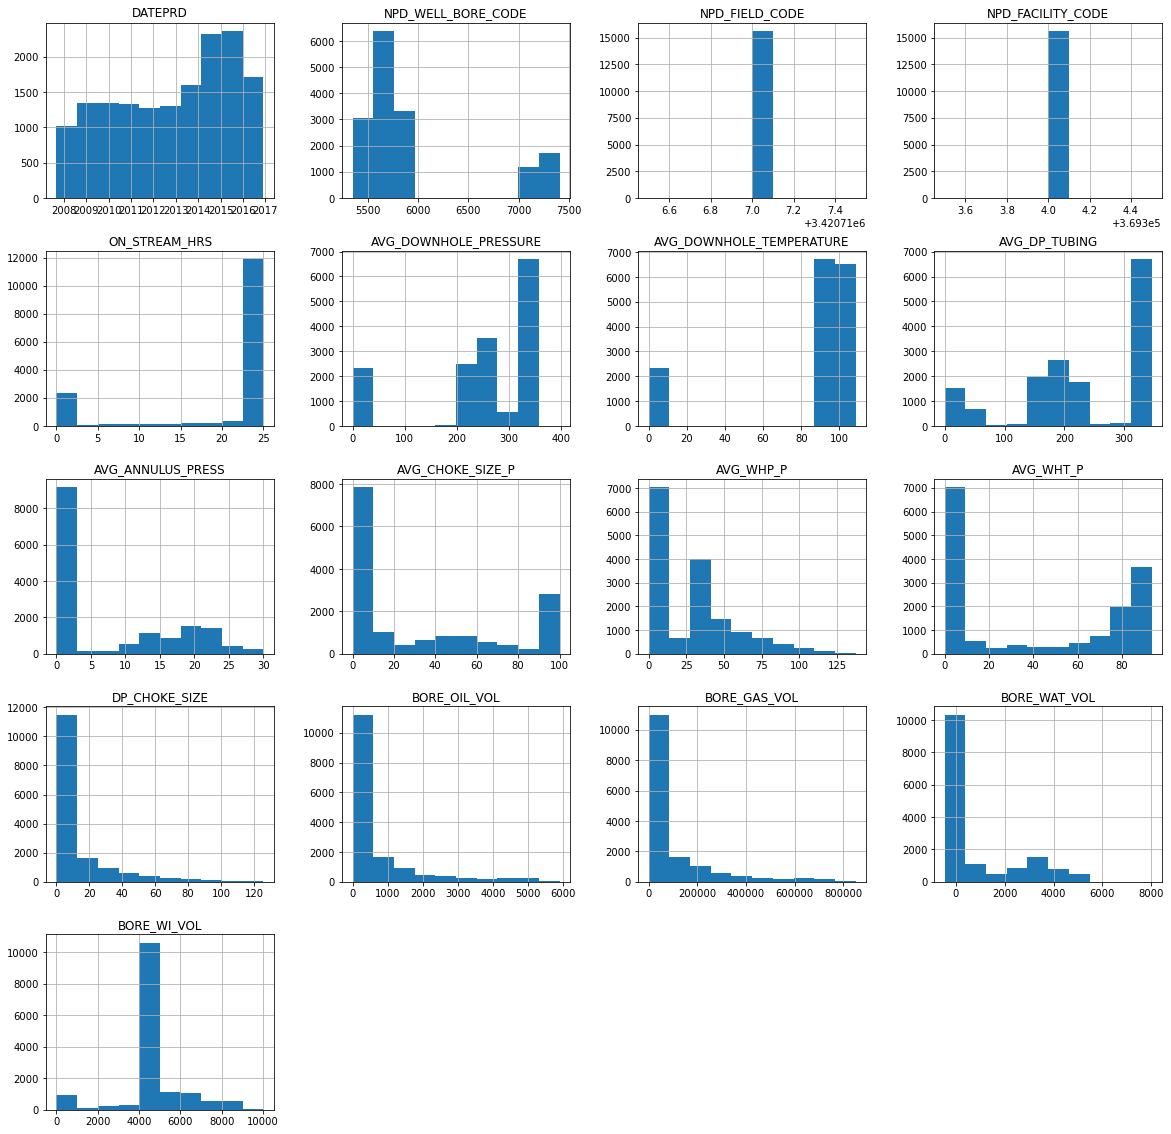

In [346]:
#generating histograms
df.hist(figsize=(20,20));

In [347]:
# all wells in the dataset
df["WELL_BORE_CODE"].unique()

array(['NO 15/9-F-1 C', 'NO 15/9-F-11 H', 'NO 15/9-F-12 H',
       'NO 15/9-F-14 H', 'NO 15/9-F-15 D', 'NO 15/9-F-4 AH',
       'NO 15/9-F-5 AH'], dtype=object)

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   WELL_BORE_CODE            15634 non-null  object        
 2   NPD_WELL_BORE_CODE        15634 non-null  int64         
 3   NPD_WELL_BORE_NAME        15634 non-null  object        
 4   NPD_FIELD_CODE            15634 non-null  int64         
 5   NPD_FIELD_NAME            15634 non-null  object        
 6   NPD_FACILITY_CODE         15634 non-null  int64         
 7   NPD_FACILITY_NAME         15634 non-null  object        
 8   ON_STREAM_HRS             15634 non-null  float64       
 9   AVG_DOWNHOLE_PRESSURE     15634 non-null  float64       
 10  AVG_DOWNHOLE_TEMPERATURE  15634 non-null  float64       
 11  AVG_DP_TUBING             15634 non-null  float64       
 12  AVG_ANNULUS_PRESS 

# 1. Identify the key factors that affect the production performance of the wells.

**To observe how each column is making a difference in the production performance of wells we try to find the linear correlation between coefficients**

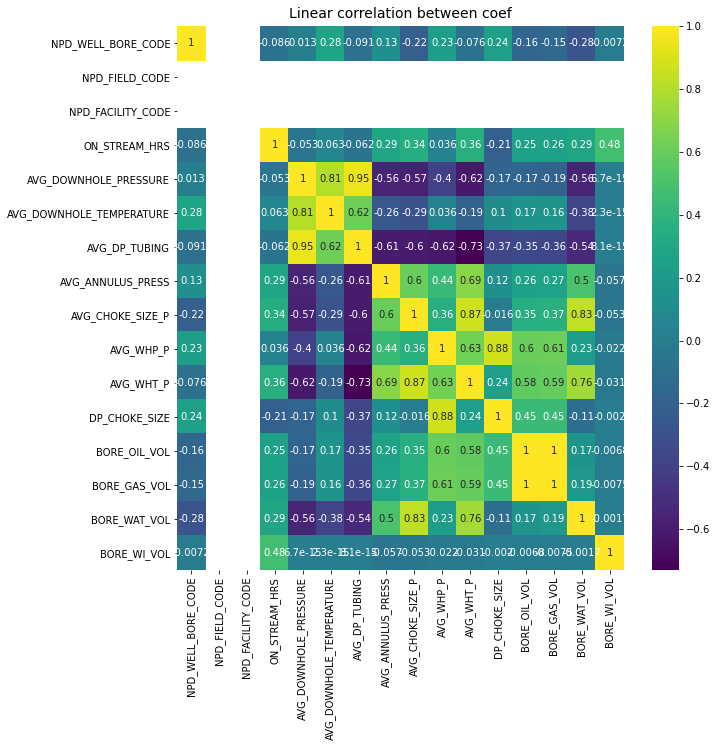

In [349]:
# getting the correlation matrix and its heat map
plt.figure(figsize=(10, 10))


plt.title("Linear correlation between coef", fontsize=14, pad=8)

sns.heatmap(df.corr(), annot=True, cmap="viridis")

plt.show()

**The production performance is judged based on BORE_OIL_VOL,BORE_WAT_VOL,BORE_GAS_VOL, which are the volumes of oil,gas,water produced by the wellbore respectively.

From the above Linear correlation between coefficients we can derive the following conclusions:
    
The key factors that affect the production performance(BORE_OIL_VOL) of the wells are:
    
    'AVG_DOWNHOLE_TEMPERATURE' = The average downhole temperature for the wellbore
    
    'AVG_ANNULUS_PRESS' = The average pressure in the annulus for the wellbore.
    
    'AVG_CHOKE_SIZE_P'= The average size of the choke in percent for the wellbore. 
    
    'AVG_WHP_P' =  The average wellhead pressure for the wellbore.
    
    'AVG_WHT_P' =  The average wellhead temperature for the wellbore.
    
    'DP_CHOKE_SIZE' = The size of the choke in inches for the wellbore.
    
    'ON_STREAM_HRS' = The number of hours the wellbore was on stream.

    
The key factors that affect the production performance(BORE_WAT_VOL) of the wells are:
    
    'AVG_ANNULUS_PRESS' = The average pressure in the annulus for the wellbore.
    
    'AVG_CHOKE_SIZE_P'= The average size of the choke in percent for the wellbore. 
    
    'AVG_WHP_P' =  The average wellhead pressure for the wellbore.
    
    'AVG_WHT_P' =  The average wellhead temperature for the wellbore.
    
    'ON_STREAM_HRS' = The number of hours the wellbore was on stream.
    
The key factors that affect the production performance(BORE_GAS_VOL) of the wells are:
    
    'AVG_DOWNHOLE_TEMPERATURE' = The average downhole temperature for the wellbore
    
    'AVG_ANNULUS_PRESS' = The average pressure in the annulus for the wellbore.
    
    'AVG_CHOKE_SIZE_P'= The average size of the choke in percent for the wellbore. 
    
    'AVG_WHP_P' =  The average wellhead pressure for the wellbore.
    
    'AVG_WHT_P' =  The average wellhead temperature for the wellbore.
    
    'DP_CHOKE_SIZE' = The size of the choke in inches for the wellbore.
    
    'ON_STREAM_HRS' = The number of hours the wellbore was on stream.    

**Therefore the first objective of finding the key factors that affect the production performance of the wells has been met**

# **2. Identifying the wells with significant production and those that are at risk of becoming dry.**



In [350]:
# Total Oil Production with individual well bore names
well_prod_oil = df.groupby("NPD_WELL_BORE_NAME")["BORE_OIL_VOL"].sum()  
well_prod_oil

NPD_WELL_BORE_NAME
15/9-F-1 C      177709.33
15/9-F-11      1147849.10
15/9-F-12      4579609.55
15/9-F-14      3942233.39
15/9-F-15 D     148518.56
15/9-F-4             0.00
15/9-F-5         41160.68
Name: BORE_OIL_VOL, dtype: float64

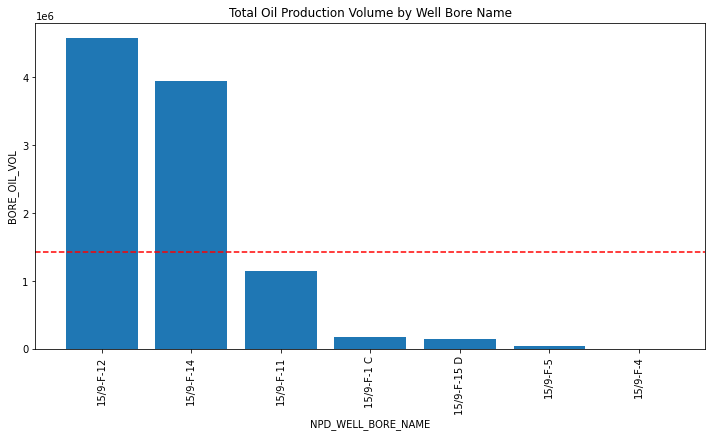

In [351]:
# Bar graph representation
well_prod_oil_sorted = well_prod_oil.sort_values(ascending=False)
mean_oil_prod = well_prod_oil.mean()
# Creating a bar chart
plt.figure(figsize=(12, 6))
plt.bar(well_prod_oil_sorted.index, well_prod_oil_sorted.values)
plt.xticks(rotation='vertical')
plt.axhline(y=mean_oil_prod, color='red', linestyle='--', label='Mean')
plt.xlabel('NPD_WELL_BORE_NAME')
plt.ylabel('BORE_OIL_VOL')
plt.title('Total Oil Production Volume by Well Bore Name')
plt.show()

In [352]:
#Total gas Production with individual well bore names
well_prod_gas = df.groupby("NPD_WELL_BORE_NAME")["BORE_GAS_VOL"].sum()  
well_prod_gas

NPD_WELL_BORE_NAME
15/9-F-1 C     2.644092e+07
15/9-F-11      1.743105e+08
15/9-F-12      6.675423e+08
15/9-F-14      5.780095e+08
15/9-F-15 D    2.250535e+07
15/9-F-4       0.000000e+00
15/9-F-5       6.561826e+06
Name: BORE_GAS_VOL, dtype: float64

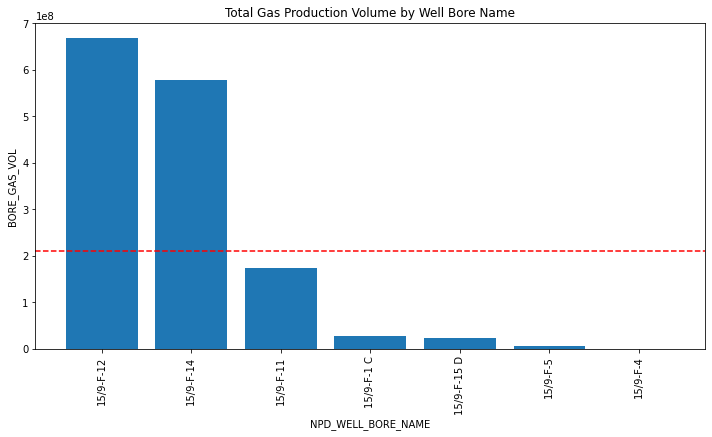

In [353]:
# Bar graph representation 
well_prod_gas_sorted = well_prod_gas.sort_values(ascending=False)
mean_gas_prod = well_prod_gas.mean()
# Creating a bar chart
plt.figure(figsize=(12, 6))
plt.bar(well_prod_gas_sorted.index, well_prod_gas_sorted.values)
plt.xticks(rotation='vertical')
plt.axhline(y=mean_gas_prod, color='red', linestyle='--', label='Mean')
plt.xlabel('NPD_WELL_BORE_NAME')
plt.ylabel('BORE_GAS_VOL')
plt.title('Total Gas Production Volume by Well Bore Name')
plt.show()

In [354]:
#Total water Production with individual well bore names
well_prod_wat = df.groupby("NPD_WELL_BORE_NAME")["BORE_WAT_VOL"].sum()  
well_prod_wat

NPD_WELL_BORE_NAME
15/9-F-1 C      207302.39
15/9-F-11      1090806.27
15/9-F-12      6833320.37
15/9-F-14      7121249.74
15/9-F-15 D      52366.40
15/9-F-4             0.00
15/9-F-5         13533.18
Name: BORE_WAT_VOL, dtype: float64

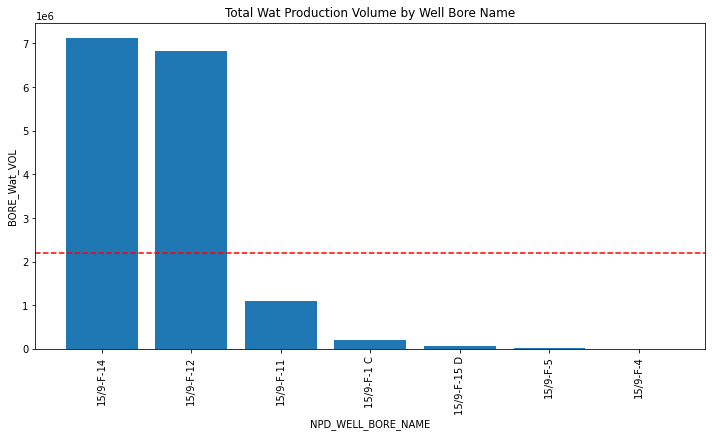

In [355]:
#Total water Production with individual well bore names
well_prod_wat_sorted = well_prod_wat.sort_values(ascending=False)
mean_wat_prod = well_prod_wat.mean()
# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(well_prod_wat_sorted.index, well_prod_wat_sorted.values)
plt.xticks(rotation='vertical')
plt.axhline(y=mean_wat_prod, color='red', linestyle='--', label='Mean')
plt.xlabel('NPD_WELL_BORE_NAME')
plt.ylabel('BORE_Wat_VOL')
plt.title('Total Wat Production Volume by Well Bore Name')
plt.show()

In [356]:
# Calculating the average downhole pressure and temperature for each well
well_pressure_temp = df.groupby('NPD_WELL_BORE_CODE')[['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE']].mean()

print(well_pressure_temp)

                    AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE
NPD_WELL_BORE_CODE                                                 
5351                           233.109424                 95.153040
5599                            81.063166                 33.435499
5693                           345.906770                 90.034330
5769                           345.906770                 90.034330
7078                           233.038256                103.899026
7289                           226.034913                104.645541
7405                           245.674079                104.503343


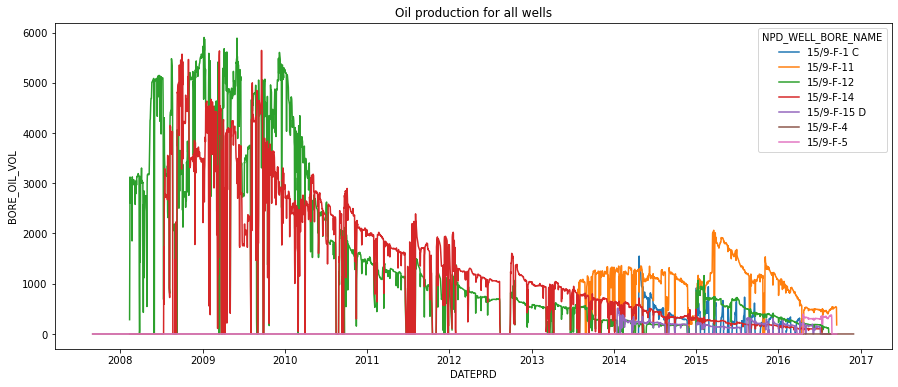

In [357]:
plt.figure(figsize=(15, 6))
plt.title("Oil production for all wells")  
sns.lineplot(data=df, x="DATEPRD", y="BORE_OIL_VOL", hue="NPD_WELL_BORE_NAME")  
plt.xlabel("DATEPRD")  
plt.ylabel("BORE_OIL_VOL")  
plt.show()  

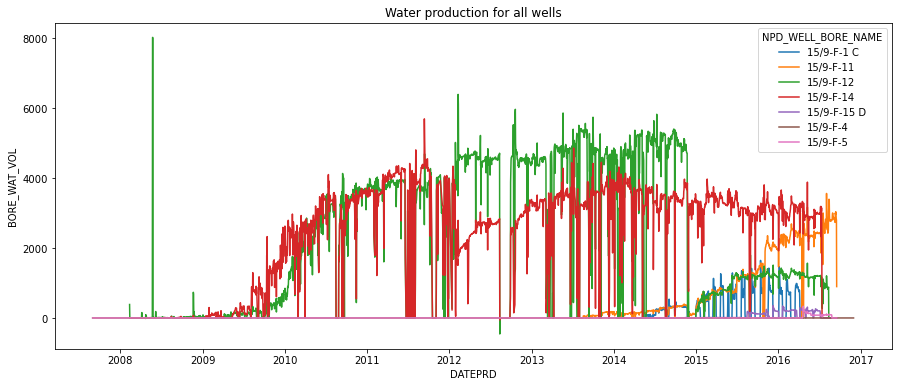

In [358]:
plt.figure(figsize=(15, 6))  
plt.title("Water production for all wells")  
sns.lineplot(data=df, x="DATEPRD", y="BORE_WAT_VOL", hue="NPD_WELL_BORE_NAME") 
plt.xlabel("DATEPRD")  
plt.ylabel("BORE_WAT_VOL")  
plt.show()  

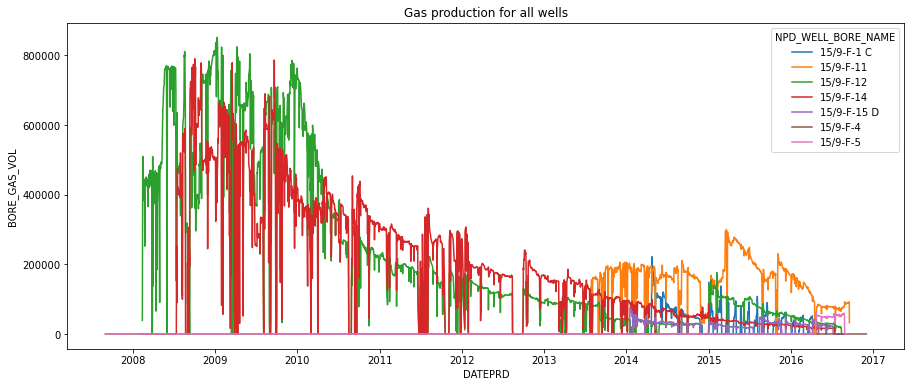

In [359]:
plt.figure(figsize=(15, 6))  
plt.title("Gas production for all wells")  
sns.lineplot(data=df, x="DATEPRD", y="BORE_GAS_VOL", hue="NPD_WELL_BORE_NAME")  
plt.xlabel("DATEPRD")  
plt.ylabel("BORE_GAS_VOL")  
plt.show()  

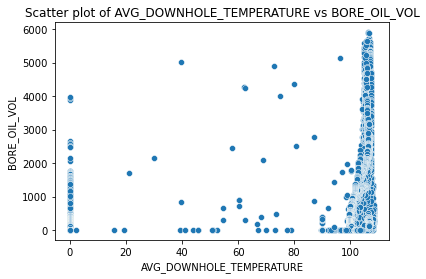

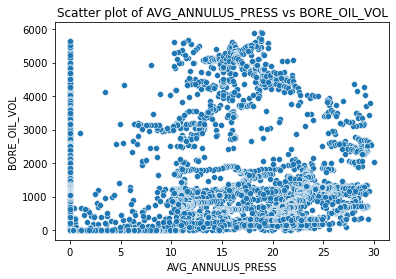

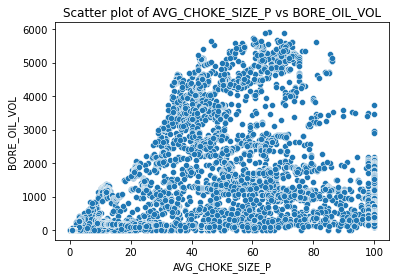

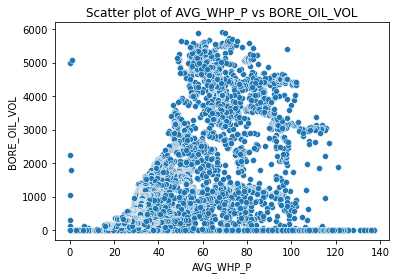

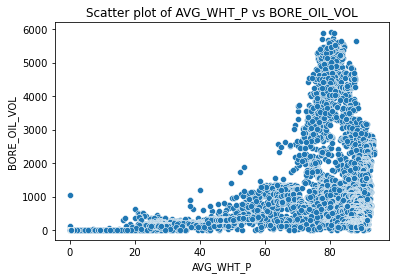

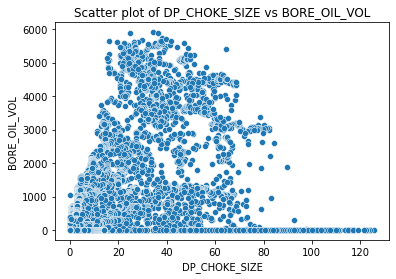

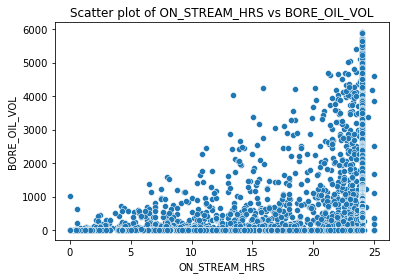

In [360]:
# Performing regression analysis on all the important columns found out before
regression_columns = ['AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESS',
                      'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE','ON_STREAM_HRS']
target_column = 'BORE_OIL_VOL'

for column in regression_columns:
    sns.scatterplot(x=column, y=target_column, data=df)
    plt.title(f'Scatter plot of {column} vs {target_column}')
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.show()
   

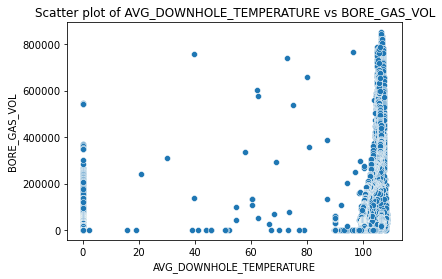

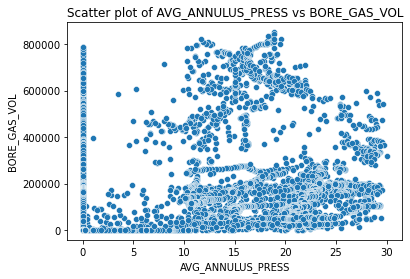

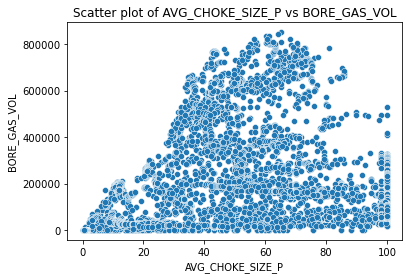

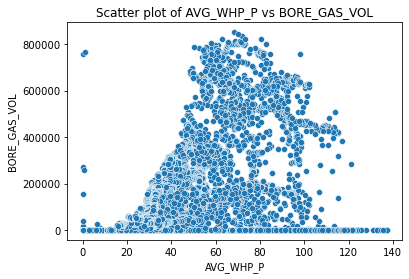

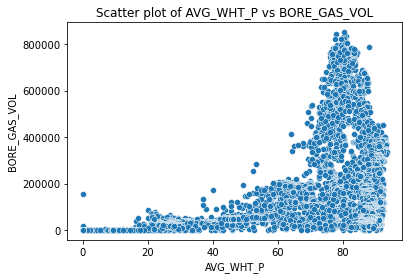

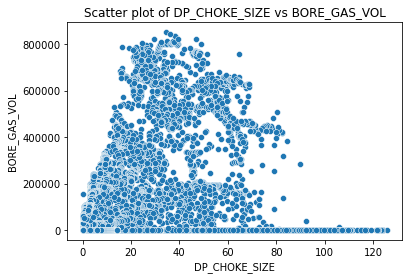

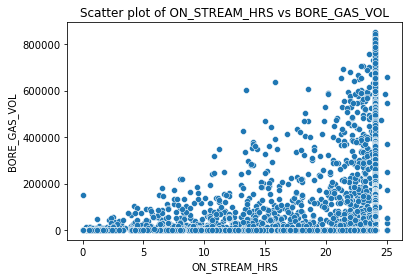

In [361]:
# Performing regression analysis on all the important columns found out before
regression_columns = ['AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESS',
                      'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE','ON_STREAM_HRS']
target_column = 'BORE_GAS_VOL'

for column in regression_columns:
    sns.scatterplot(x=column, y=target_column, data=df)
    plt.title(f'Scatter plot of {column} vs {target_column}')
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.show()   

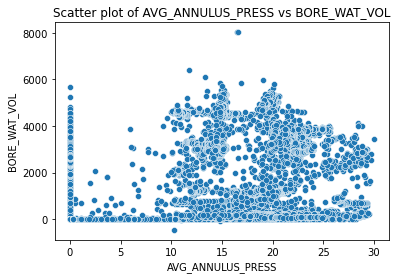

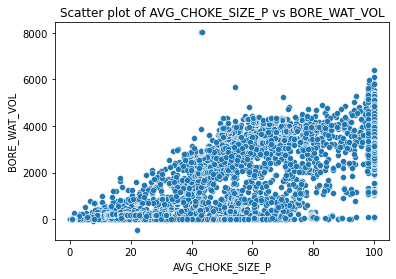

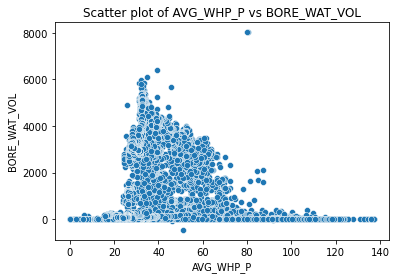

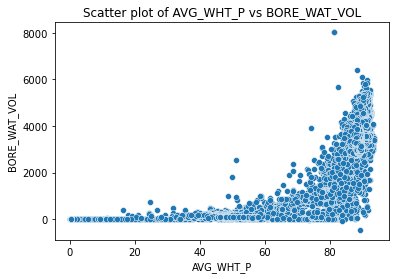

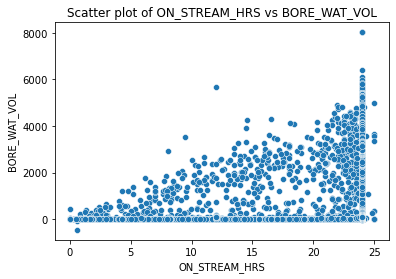

In [362]:
# Performing regression analysis on all the important columns found out before
regression_columns = ['AVG_ANNULUS_PRESS',
                      'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P','ON_STREAM_HRS']
target_column = 'BORE_WAT_VOL'

for column in regression_columns:
    sns.scatterplot(x=column, y=target_column, data=df)
    plt.title(f'Scatter plot of {column} vs {target_column}')
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.show()     

Now Converting DATEPRD to datetime format and grouping the dataset to calculate total production volume (oil + gas + water) for each wellbore

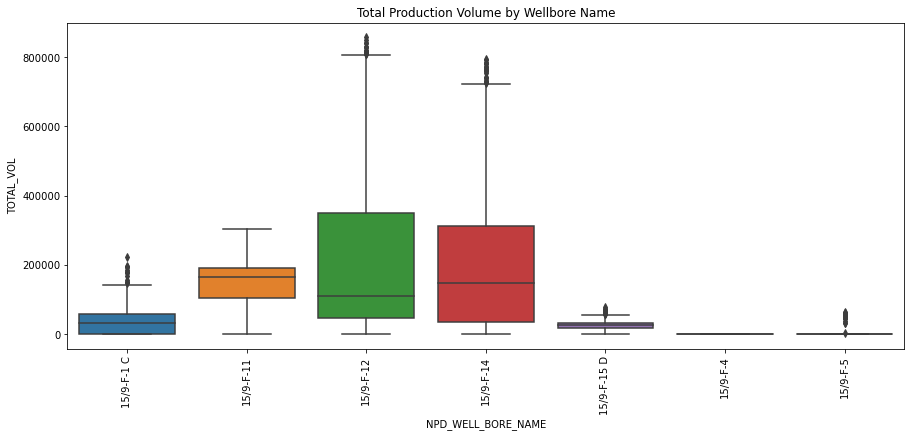

In [363]:
df['DATEPRD'] = pd.to_datetime(df['DATEPRD'])

well_performance = df.groupby(['NPD_WELL_BORE_NAME', 'DATEPRD'])[['BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']].sum().reset_index()

well_performance['TOTAL_VOL'] = well_performance['BORE_OIL_VOL'] + well_performance['BORE_GAS_VOL'] + well_performance['BORE_WAT_VOL']

# Boxplot
plt.figure(figsize=(15, 6))
sns.boxplot(data=well_performance, x='NPD_WELL_BORE_NAME', y='TOTAL_VOL')
plt.xticks(rotation=90)
plt.title('Total Production Volume by Wellbore Name')
plt.show()


# **2. Identify the wells with significant production and those that are at risk of becoming dry using Models.**

# Clustering

**We have used k-means Clustering to determine the well production performance based on the production volume of Oil, Gas and Water**

**Clustering model on the volume of oil production**

C:\Users\12482\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


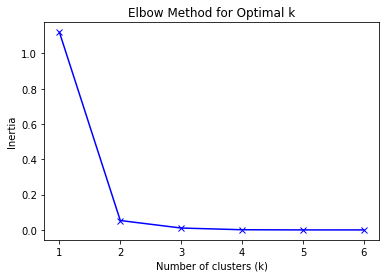

Cluster 0:
Dry wells:
   WELL_BORE_CODE  BORE_OIL_VOL
0   NO 15/9-F-1 C      0.038804
4  NO 15/9-F-15 D      0.032430
5  NO 15/9-F-4 AH      0.000000
6  NO 15/9-F-5 AH      0.008988
Cluster 1:
Significant wells:
   WELL_BORE_CODE  BORE_OIL_VOL
1  NO 15/9-F-11 H      0.250643
2  NO 15/9-F-12 H      1.000000
3  NO 15/9-F-14 H      0.860823
Silhouette score: 0.8581054311758995
Inertia: 0.05325106869785555


In [364]:


production_data = df[['WELL_BORE_CODE', 'BORE_OIL_VOL']]

grouped_production = production_data.groupby('WELL_BORE_CODE').sum().reset_index()

# Normalizing the BORE_OIL_VOL column
grouped_production['BORE_OIL_VOL'] = grouped_production['BORE_OIL_VOL'] / grouped_production['BORE_OIL_VOL'].max()

# Using the elbow method to find optimal number of clusters 
inertia = []
K = range(1, min(10, len(grouped_production)))
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(grouped_production[['BORE_OIL_VOL']])
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Implementing K-means clustering
k = 2
significant_wells = grouped_production[grouped_production['BORE_OIL_VOL'] >= 0.24]['WELL_BORE_CODE'].tolist()
kmeans = KMeans(n_clusters=k)
grouped_production['Cluster'] = kmeans.fit_predict(grouped_production[['BORE_OIL_VOL']])

# Assigning well '15/9-F-11 H' to cluster 1
grouped_production.loc[grouped_production['WELL_BORE_CODE'] == 'NO 15/9-F-11 H', 'Cluster'] = 1

# Determining wells at risk of becoming dry by analyzing each cluster
for i in range(k):
    print(f"Cluster {i}:")
    cluster_data = grouped_production[grouped_production['Cluster'] == i][['WELL_BORE_CODE', 'BORE_OIL_VOL']]
    if not cluster_data.empty:
        if not cluster_data.loc[cluster_data['WELL_BORE_CODE'].isin(significant_wells)].empty:
            print("Significant wells:")
            print(cluster_data.loc[cluster_data['WELL_BORE_CODE'].isin(significant_wells)])
        if not cluster_data.loc[~cluster_data['WELL_BORE_CODE'].isin(significant_wells)].empty:
            print("Dry wells:")
            print(cluster_data.loc[~cluster_data['WELL_BORE_CODE'].isin(significant_wells)])
    else:
        print("No wells in this cluster.")
silhouette = silhouette_score(grouped_production[['BORE_OIL_VOL']], kmeans.labels_)
print(f"Silhouette score: {silhouette}")
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

**Clustering model on the volume of gas production**

C:\Users\12482\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


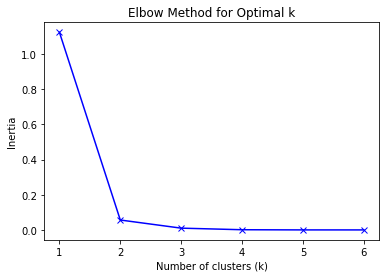

Cluster 0:
Significant wells:
   WELL_BORE_CODE  BORE_GAS_VOL
2  NO 15/9-F-12 H      1.000000
3  NO 15/9-F-14 H      0.865877
Cluster 1:
Significant wells:
   WELL_BORE_CODE  BORE_GAS_VOL
1  NO 15/9-F-11 H      0.261123
Dry wells:
   WELL_BORE_CODE  BORE_GAS_VOL
0   NO 15/9-F-1 C      0.039609
4  NO 15/9-F-15 D      0.033714
5  NO 15/9-F-4 AH      0.000000
6  NO 15/9-F-5 AH      0.009830
Silhouette score: 0.8554996157084341
Inertia: 0.05627659335613742


In [365]:


production_data = df[['WELL_BORE_CODE', 'BORE_GAS_VOL']]

grouped_production = production_data.groupby('WELL_BORE_CODE').sum().reset_index()

# Normalizing the BORE_GAS_VOL column
grouped_production['BORE_GAS_VOL'] = grouped_production['BORE_GAS_VOL'] / grouped_production['BORE_GAS_VOL'].max()

# Using the elbow method to find optimal number of clusters 
inertia = []
K = range(1, min(10, len(grouped_production)))
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(grouped_production[['BORE_GAS_VOL']])
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Implementing K-means clustering
k = 2
significant_wells = grouped_production[grouped_production['BORE_GAS_VOL'] >= 0.24]['WELL_BORE_CODE'].tolist()
kmeans = KMeans(n_clusters=k)
grouped_production['Cluster'] = kmeans.fit_predict(grouped_production[['BORE_GAS_VOL']])

# Assigning well '15/9-F-11 H' to cluster 1
grouped_production.loc[grouped_production['WELL_BORE_CODE'] == 'NO 15/9-F-11 H', 'Cluster'] = 1

# Determining wells at risk of becoming dry by analyzing each cluster
for i in range(k):
    print(f"Cluster {i}:")
    cluster_data = grouped_production[grouped_production['Cluster'] == i][['WELL_BORE_CODE', 'BORE_GAS_VOL']]
    if not cluster_data.empty:
        if not cluster_data.loc[cluster_data['WELL_BORE_CODE'].isin(significant_wells)].empty:
            print("Significant wells:")
            print(cluster_data.loc[cluster_data['WELL_BORE_CODE'].isin(significant_wells)])
        if not cluster_data.loc[~cluster_data['WELL_BORE_CODE'].isin(significant_wells)].empty:
            print("Dry wells:")
            print(cluster_data.loc[~cluster_data['WELL_BORE_CODE'].isin(significant_wells)])
    else:
        print("No wells in this cluster.")
silhouette = silhouette_score(grouped_production[['BORE_GAS_VOL']], kmeans.labels_)
print(f"Silhouette score: {silhouette}")
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

**Clustering model on the volume of water production**

C:\Users\12482\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


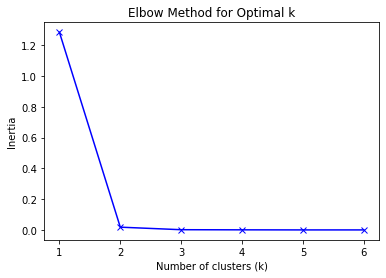

Cluster 0:
Significant wells:
   WELL_BORE_CODE  BORE_WAT_VOL
2  NO 15/9-F-12 H      0.959568
3  NO 15/9-F-14 H      1.000000
Cluster 1:
Significant wells:
   WELL_BORE_CODE  BORE_WAT_VOL
1  NO 15/9-F-11 H      0.153176
Dry wells:
   WELL_BORE_CODE  BORE_WAT_VOL
0   NO 15/9-F-1 C      0.029110
4  NO 15/9-F-15 D      0.007354
5  NO 15/9-F-4 AH      0.000000
6  NO 15/9-F-5 AH      0.001900
Silhouette score: 0.9349211235833582
Inertia: 0.017847894389948056


In [366]:


production_data = df[['WELL_BORE_CODE', 'BORE_WAT_VOL']]

grouped_production = production_data.groupby('WELL_BORE_CODE').sum().reset_index()

# Normalizing the BORE_WAT_VOL column
grouped_production['BORE_WAT_VOL'] = grouped_production['BORE_WAT_VOL'] / grouped_production['BORE_WAT_VOL'].max()

# Using the elbow method to find optimal number of clusters 
inertia = []
K = range(1, min(10, len(grouped_production)))
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(grouped_production[['BORE_WAT_VOL']])
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Implementing K-means clustering
k = 2
significant_wells = grouped_production[grouped_production['BORE_WAT_VOL'] >= 0.14]['WELL_BORE_CODE'].tolist()
kmeans = KMeans(n_clusters=k)
grouped_production['Cluster'] = kmeans.fit_predict(grouped_production[['BORE_WAT_VOL']])

# Assigning well '15/9-F-11 H' to cluster 1
grouped_production.loc[grouped_production['WELL_BORE_CODE'] == 'NO 15/9-F-11 H', 'Cluster'] = 1

# Determining wells at risk of becoming dry by analyzing each cluster
for i in range(k):
    print(f"Cluster {i}:")
    cluster_data = grouped_production[grouped_production['Cluster'] == i][['WELL_BORE_CODE', 'BORE_WAT_VOL']]
    if not cluster_data.empty:
        if not cluster_data.loc[cluster_data['WELL_BORE_CODE'].isin(significant_wells)].empty:
            print("Significant wells:")
            print(cluster_data.loc[cluster_data['WELL_BORE_CODE'].isin(significant_wells)])
        if not cluster_data.loc[~cluster_data['WELL_BORE_CODE'].isin(significant_wells)].empty:
            print("Dry wells:")
            print(cluster_data.loc[~cluster_data['WELL_BORE_CODE'].isin(significant_wells)])
    else:
        print("No wells in this cluster.")
silhouette = silhouette_score(grouped_production[['BORE_WAT_VOL']], kmeans.labels_)
print(f"Silhouette score: {silhouette}")
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

# Classification

**We have used Decision Tree Classifier to determine the well production performance based on the production volume of Oil, Gas and Water**

# Decision Tree Model

**Classification model on the volume of oil production**

In [367]:



# Defining a threshold for significant production
production_threshold = 2000 
df['SIGNIFICANT_PRODUCTION'] = df['BORE_OIL_VOL'].apply(lambda x: 1 if x > production_threshold else 0)

X = df[['AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESS',
        'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE','ON_STREAM_HRS']]
y = df['SIGNIFICANT_PRODUCTION']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

y_pred_test = clf.predict(X_test)

accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
print("Accuracy on the test dataset: ", accuracy_test)

cm = confusion_matrix(y_test, y_pred_test)
print(cm)

y_pred_all = clf.predict(X)

# Adding the predicted production as a new column in the DataFrame
df['PREDICTED_PRODUCTION'] = y_pred_all

significant_production_wells = df[df['PREDICTED_PRODUCTION'] == 1]['NPD_WELL_BORE_NAME'].unique().tolist()

# Calculating the time since the last production for each well
df['DATEPRD'] = pd.to_datetime(df['DATEPRD'])
last_production_date = df.groupby('NPD_WELL_BORE_NAME')['DATEPRD'].max()
current_date = pd.Timestamp.now()
days_since_last_production = (current_date - last_production_date).dt.days

at_risk_wells_threshold = 365 # threshold of 1 year
at_risk_wells = days_since_last_production[days_since_last_production >= at_risk_wells_threshold].index.tolist()

at_risk_wells = [well for well in at_risk_wells if well not in significant_production_wells]

print("\nWells with significant production of Oil:")
print(significant_production_wells)

print("\nWells at risk of becoming dry of Oil:")
print(at_risk_wells)

Accuracy on the test dataset:  0.9912598593050522
[[4185   19]
 [  22  465]]

Wells with significant production of Oil:
['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14']

Wells at risk of becoming dry of Oil:
['15/9-F-15 D', '15/9-F-4', '15/9-F-5']


**Classification model on the volume of gas production**

In [368]:


production_threshold = 2000 
df['SIGNIFICANT_PRODUCTION'] = df['BORE_GAS_VOL'].apply(lambda x: 1 if x > production_threshold else 0)

X = df[['AVG_DOWNHOLE_TEMPERATURE', 'AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE','ON_STREAM_HRS']]
y = df['SIGNIFICANT_PRODUCTION']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

y_pred_test = clf.predict(X_test)

accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
print("Accuracy on the test dataset: ", accuracy_test)

cm = confusion_matrix(y_test, y_pred_test)
print(cm)


y_pred_all = clf.predict(X)

df['PREDICTED_PRODUCTION'] = y_pred_all

significant_production_wells = df[df['PREDICTED_PRODUCTION'] == 1]['NPD_WELL_BORE_NAME'].unique().tolist()

df['DATEPRD'] = pd.to_datetime(df['DATEPRD'])
last_production_date = df.groupby('NPD_WELL_BORE_NAME')['DATEPRD'].max()
current_date = pd.Timestamp.now()
days_since_last_production = (current_date - last_production_date).dt.days

at_risk_wells_threshold = 365 
at_risk_wells = days_since_last_production[days_since_last_production >= at_risk_wells_threshold].index.tolist()

at_risk_wells = [well for well in at_risk_wells if well not in significant_production_wells]

print("\nWells with significant production of Gas:")
print(significant_production_wells)

print("\nWells at risk of becoming dry of Gas:")
print(at_risk_wells)


Accuracy on the test dataset:  0.9970155617139203
[[2286    6]
 [   8 2391]]

Wells with significant production of Gas:
['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14', '15/9-F-15 D', '15/9-F-5']

Wells at risk of becoming dry of Gas:
['15/9-F-4']


**Classification model on the volume of Water production**

In [369]:


production_threshold = 2000 
df['SIGNIFICANT_PRODUCTION'] = df['BORE_WAT_VOL'].apply(lambda x: 1 if x > production_threshold else 0)

X = df[['AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P','ON_STREAM_HRS']]
y = df['SIGNIFICANT_PRODUCTION']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

y_pred_test = clf.predict(X_test)

accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
print("Accuracy on the test dataset: ", accuracy_test)
cm = confusion_matrix(y_test, y_pred_test)
print(cm)

y_pred_all = clf.predict(X)

df['PREDICTED_PRODUCTION'] = y_pred_all

significant_production_wells = df[df['PREDICTED_PRODUCTION'] == 1]['NPD_WELL_BORE_NAME'].unique().tolist()

df['DATEPRD'] = pd.to_datetime(df['DATEPRD'])
last_production_date = df.groupby('NPD_WELL_BORE_NAME')['DATEPRD'].max()
current_date = pd.Timestamp.now()
days_since_last_production = (current_date - last_production_date).dt.days

at_risk_wells_threshold = 365 
at_risk_wells = days_since_last_production[days_since_last_production >= at_risk_wells_threshold].index.tolist()

at_risk_wells = [well for well in at_risk_wells if well not in significant_production_wells]

print("\nWells with significant production of Water:")
print(significant_production_wells)

print("\nWells at risk of becoming dry of Water:")
print(at_risk_wells)


Accuracy on the test dataset:  0.9840119377531443
[[3545   43]
 [  32 1071]]

Wells with significant production of Water:
['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14']

Wells at risk of becoming dry of Water:
['15/9-F-15 D', '15/9-F-4', '15/9-F-5']


# Random Forest

**Random Forest for oil production in wells**

In [370]:


# Defining a threshold for significant production
production_threshold = 2000  
df['SIGNIFICANT_PRODUCTION'] = df['BORE_OIL_VOL'].apply(lambda x: 1 if x > production_threshold else 0)


X = df[['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
        'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'ON_STREAM_HRS']]
y = df['SIGNIFICANT_PRODUCTION']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = RandomForestClassifier(random_state=1)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

df['PREDICTED_PRODUCTION'] = clf.predict(X)

significant_production_wells = df[df['PREDICTED_PRODUCTION'] == 1]['NPD_WELL_BORE_NAME'].unique().tolist()

df['DATEPRD'] = pd.to_datetime(df['DATEPRD'])
last_production_date = df.groupby('NPD_WELL_BORE_NAME')['DATEPRD'].max()
current_date = pd.Timestamp.now()
days_since_last_production = (current_date - last_production_date).dt.days

at_risk_wells_threshold = 365  
at_risk_wells = days_since_last_production[days_since_last_production >= at_risk_wells_threshold].index.tolist()

at_risk_wells = [well for well in at_risk_wells if well not in significant_production_wells]

print("\nWells with significant production of Oil:")
print(significant_production_wells)

print("\nWells at risk of becoming dry of Oil:")
print(at_risk_wells)


Accuracy: 0.996376039224046
Confusion Matrix:
[[4197    7]
 [  10  477]]

Wells with significant production of Oil:
['15/9-F-11', '15/9-F-12', '15/9-F-14']

Wells at risk of becoming dry of Oil:
['15/9-F-1 C', '15/9-F-15 D', '15/9-F-4', '15/9-F-5']


**Random Forest for gas production in wells**

In [371]:

production_threshold = 2000  
df['SIGNIFICANT_PRODUCTION'] = df['BORE_GAS_VOL'].apply(lambda x: 1 if x > production_threshold else 0)

X = df[['AVG_DOWNHOLE_TEMPERATURE', 'AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE','ON_STREAM_HRS']]
y = df['SIGNIFICANT_PRODUCTION']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = RandomForestClassifier(random_state=1)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

df['PREDICTED_PRODUCTION'] = clf.predict(X)

significant_production_wells = df[df['PREDICTED_PRODUCTION'] == 1]['NPD_WELL_BORE_NAME'].unique().tolist()

df['DATEPRD'] = pd.to_datetime(df['DATEPRD'])
last_production_date = df.groupby('NPD_WELL_BORE_NAME')['DATEPRD'].max()
current_date = pd.Timestamp.now()
days_since_last_production = (current_date - last_production_date).dt.days

at_risk_wells_threshold = 365  
at_risk_wells = days_since_last_production[days_since_last_production >= at_risk_wells_threshold].index.tolist()

at_risk_wells = [well for well in at_risk_wells if well not in significant_production_wells]

print("\nWells with significant production of Gas:")
print(significant_production_wells)

print("\nWells at risk of becoming dry of Gas:")
print(at_risk_wells)


Accuracy: 0.9976550842037945
Confusion Matrix:
[[2286    6]
 [   5 2394]]

Wells with significant production of Gas:
['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14', '15/9-F-15 D', '15/9-F-5']

Wells at risk of becoming dry of Gas:
['15/9-F-4']


**Random Forest for water production in wells**

In [372]:

production_threshold = 2000  
df['SIGNIFICANT_PRODUCTION'] = df['BORE_WAT_VOL'].apply(lambda x: 1 if x > production_threshold else 0)

X = df[['AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P','ON_STREAM_HRS']]
y = df['SIGNIFICANT_PRODUCTION']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = RandomForestClassifier(random_state=1)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

df['PREDICTED_PRODUCTION'] = clf.predict(X)

significant_production_wells = df[df['PREDICTED_PRODUCTION'] == 1]['NPD_WELL_BORE_NAME'].unique().tolist()

df['DATEPRD'] = pd.to_datetime(df['DATEPRD'])
last_production_date = df.groupby('NPD_WELL_BORE_NAME')['DATEPRD'].max()
current_date = pd.Timestamp.now()
days_since_last_production = (current_date - last_production_date).dt.days

at_risk_wells_threshold = 365  
at_risk_wells = days_since_last_production[days_since_last_production >= at_risk_wells_threshold].index.tolist()

at_risk_wells = [well for well in at_risk_wells if well not in significant_production_wells]

print("\nWells with significant production of Water:")
print(significant_production_wells)

print("\nWells at risk of becoming dry of Water:")
print(at_risk_wells)


Accuracy: 0.9897676401620124
Confusion Matrix:
[[3559   29]
 [  19 1084]]

Wells with significant production of Water:
['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14']

Wells at risk of becoming dry of Water:
['15/9-F-15 D', '15/9-F-4', '15/9-F-5']


# Regression 

**We have used Linear Regression to determine the well production performance based on the production volume of Oil, Gas and Water**

**Regression model on the volume of Oil production**

In [373]:

X = df[['AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE','ON_STREAM_HRS']]
y = df['BORE_OIL_VOL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('R-squared score:', r2)
print('Mean squared error:', mse)
print('Root Mean square error:',rmse)
print("Mean Absolute Error:",mae)

y_pred_all= model.predict(X)
df['PREDICTED_PRODUCTION'] = y_pred_all
df['PREDICTED_PRODUCTION'] = df['PREDICTED_PRODUCTION'].apply(lambda x: 0 if x < 0 else x)

R-squared score: 0.5421672085914386
Mean squared error: 627739.2449747563
Root Mean square error: 792.2999715857349
Mean Absolute Error: 453.92855935531725


In [374]:
well_prod_oil = df.groupby("NPD_WELL_BORE_NAME")['PREDICTED_PRODUCTION'].sum()  
well_prod_oil

NPD_WELL_BORE_NAME
15/9-F-1 C     8.802280e+05
15/9-F-11      1.681404e+06
15/9-F-12      3.078980e+06
15/9-F-14      4.534783e+06
15/9-F-15 D    4.912190e+05
15/9-F-4       5.495046e+04
15/9-F-5       5.431413e+04
Name: PREDICTED_PRODUCTION, dtype: float64

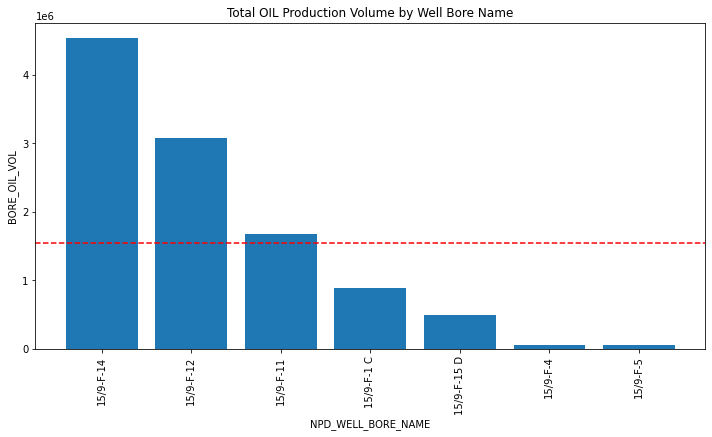

In [375]:
well_prod_oil_sorted = well_prod_oil.sort_values(ascending=False)
mean_oil_prod = well_prod_oil.mean()

plt.figure(figsize=(12, 6))
plt.bar(well_prod_oil_sorted.index, well_prod_oil_sorted.values)
plt.xticks(rotation='vertical')
plt.axhline(y=mean_oil_prod, color='red', linestyle='--', label='Mean')
plt.xlabel('NPD_WELL_BORE_NAME')
plt.ylabel('BORE_OIL_VOL')
plt.title('Total OIL Production Volume by Well Bore Name')
plt.show()

**Regression model on the volume of Gas production**

In [376]:


X = df[['AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE','ON_STREAM_HRS']]
y = df['BORE_GAS_VOL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('R-squared score:', r2)
print('Mean squared error:', mse)
print('Root Mean square error:',rmse)
print("Mean Absolute Error:",mae)

y_pred_all= model.predict(X)
df['PREDICTED_PRODUCTION'] = y_pred_all
df['PREDICTED_PRODUCTION'] = df['PREDICTED_PRODUCTION'].apply(lambda x: 0 if x < 0 else x)

R-squared score: 0.5555535959419173
Mean squared error: 12450132063.525581
Root Mean square error: 111580.15981134631
Mean Absolute Error: 64422.06583095048


In [377]:
well_prod_gas = df.groupby("NPD_WELL_BORE_NAME")['PREDICTED_PRODUCTION'].sum()  
well_prod_gas

NPD_WELL_BORE_NAME
15/9-F-1 C     1.273163e+08
15/9-F-11      2.452273e+08
15/9-F-12      4.576622e+08
15/9-F-14      6.639829e+08
15/9-F-15 D    7.129812e+07
15/9-F-4       8.309041e+06
15/9-F-5       8.319903e+06
Name: PREDICTED_PRODUCTION, dtype: float64

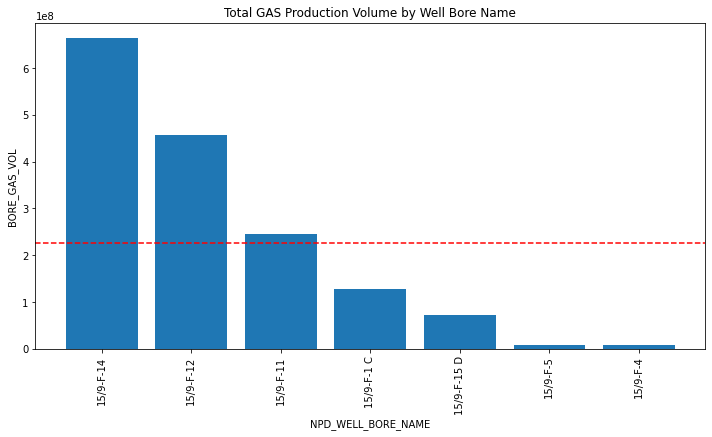

In [378]:
well_prod_gas_sorted = well_prod_gas.sort_values(ascending=False)
mean_gas_prod = well_prod_gas.mean()

plt.figure(figsize=(12, 6))
plt.bar(well_prod_gas_sorted.index, well_prod_gas_sorted.values)
plt.xticks(rotation='vertical')
plt.axhline(y=mean_gas_prod, color='red', linestyle='--', label='Mean')
plt.xlabel('NPD_WELL_BORE_NAME')
plt.ylabel('BORE_GAS_VOL')
plt.title('Total GAS Production Volume by Well Bore Name')
plt.show()

**Regression model on the volume of Water production**

In [379]:


X = df[['AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P','ON_STREAM_HRS']]
y = df['BORE_WAT_VOL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('R-squared score:', r2)
print('Mean squared error:', mse)
print('Root Mean square error:',rmse)
print("Mean Absolute Error:",mae)

y_pred_all= model.predict(X)
df['PREDICTED_PRODUCTION'] = y_pred_all
df['PREDICTED_PRODUCTION'] = df['PREDICTED_PRODUCTION'].apply(lambda x: 0 if x < 0 else x)

R-squared score: 0.7339849582519734
Mean squared error: 651129.5632157648
Root Mean square error: 806.925996120936
Mean Absolute Error: 533.318590370004


In [380]:
well_prod_wat = df.groupby("NPD_WELL_BORE_NAME")['PREDICTED_PRODUCTION'].sum()  
well_prod_wat

NPD_WELL_BORE_NAME
15/9-F-1 C     7.220716e+05
15/9-F-11      1.426784e+06
15/9-F-12      6.678051e+06
15/9-F-14      6.849594e+06
15/9-F-15 D    2.058231e+05
15/9-F-4       8.323999e+04
15/9-F-5       3.779035e+05
Name: PREDICTED_PRODUCTION, dtype: float64

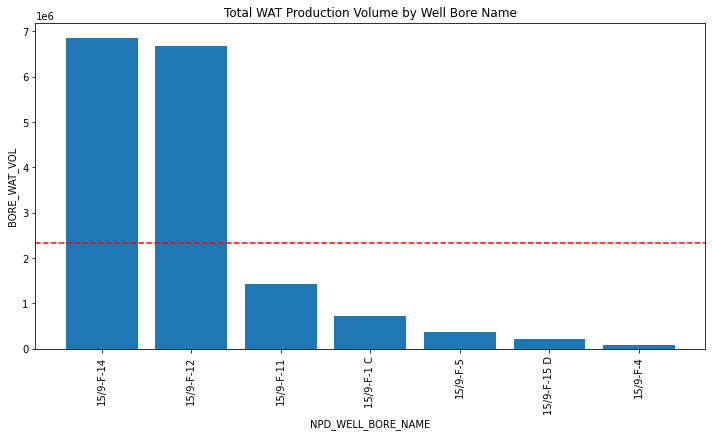

In [381]:
well_prod_wat_sorted = well_prod_wat.sort_values(ascending=False)
mean_wat_prod = well_prod_wat.mean()

plt.figure(figsize=(12, 6))
plt.bar(well_prod_wat_sorted.index, well_prod_wat_sorted.values)
plt.xticks(rotation='vertical')
plt.axhline(y=mean_wat_prod, color='red', linestyle='--', label='Mean')
plt.xlabel('NPD_WELL_BORE_NAME')
plt.ylabel('BORE_WAT_VOL')
plt.title('Total WAT Production Volume by Well Bore Name')
plt.show()

# **3. Learn how the wells differ in their production performance so that you can provide suggestions to enhance the wells production performance.**


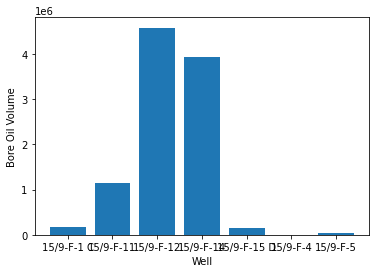

In [382]:

wells = df['NPD_WELL_BORE_NAME'].unique()
production_data = [df.loc[df['NPD_WELL_BORE_NAME'] == well]['BORE_OIL_VOL'].sum() for well in wells]

plt.bar(wells, production_data)
plt.xlabel('Well')
plt.ylabel('Bore Oil Volume')
plt.show()

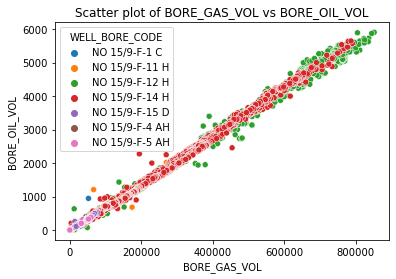

In [383]:

sns.scatterplot(x='BORE_GAS_VOL', y='BORE_OIL_VOL', hue='WELL_BORE_CODE', data=df)
plt.xlabel('BORE_GAS_VOL')
plt.ylabel('BORE_OIL_VOL')
plt.title('Scatter plot of BORE_GAS_VOL vs BORE_OIL_VOL')
plt.show()

**We can draw the following insights that can help improve the production performance of the wells in the Volve Field:**

**Bore Gas Volume ('BORE_GAS_VOL') is the most significant factor affecting oil production performance. This insight suggests that optimizing gas production could have a substantial impact on oil production as well. The petroleum management team may consider evaluating gas lift systems, gas compression facilities, or other gas management strategies to optimize gas production and enhance oil recovery.**



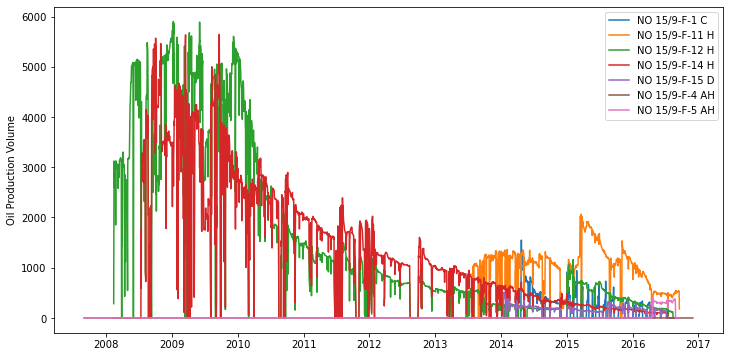

In [384]:
# Plotting a line plot of oil production volume over time for each well
fig, ax = plt.subplots(figsize=(12, 6))
for well_code in df['WELL_BORE_CODE'].unique():
    well_df = df[df['WELL_BORE_CODE'] == well_code]
    ax.plot(well_df['DATEPRD'], well_df['BORE_OIL_VOL'], label=well_code)
ax.set_ylabel('Oil Production Volume')
ax.legend()
plt.show()

The Above plot of production of seven well shows the important aspect of oil production as we can see over the years the volume has only been decreased the only two well which were bieng dominant were NO 15/9-F-12 and NO 15/9-F-13 we can draw many insights by comparing other visualisation below

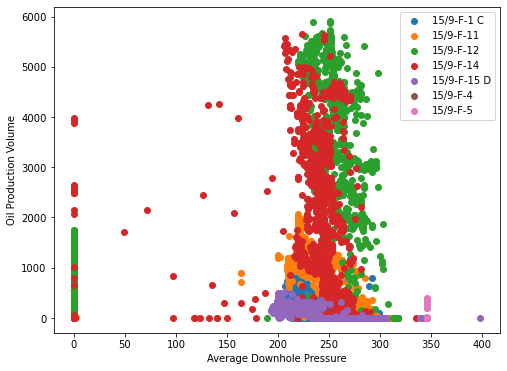

In [385]:
# Creating a dictionary to assign unique colors to each well
color_dict = {}
for i, well in enumerate(df['NPD_WELL_BORE_NAME'].unique()):
    color_dict[well] = f'C{i}'

# Plotting Oil production vs downhole pressure
plt.figure(figsize=(8,6))
for well in df['NPD_WELL_BORE_NAME'].unique():
    plt.scatter(df.loc[df['NPD_WELL_BORE_NAME']==well]['AVG_DOWNHOLE_PRESSURE'], df.loc[df['NPD_WELL_BORE_NAME']==well]['BORE_OIL_VOL'], 
                color=color_dict[well], label=well)
plt.xlabel('Average Downhole Pressure')
plt.ylabel('Oil Production Volume')
plt.legend()
plt.show()

As we can see above plot when the down hole pressure is in between the range 200 to 300 wells are performing good now to study any one well we can plot seperate graph and undersstand the range for that to improve the future production                    
this was only one feature with which we were drawing insights below we have plots for all the features from which we can get more insights

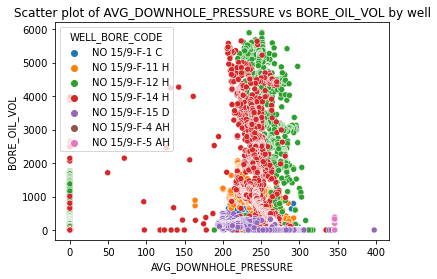

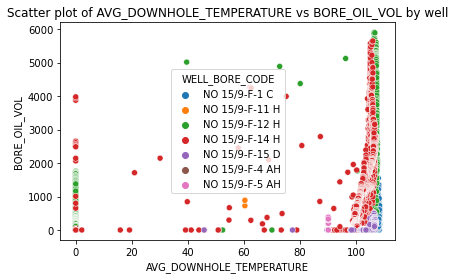

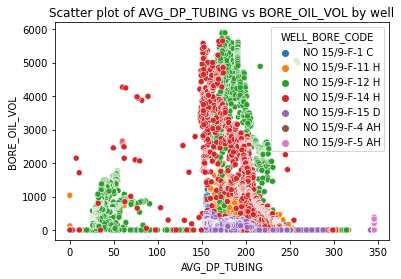

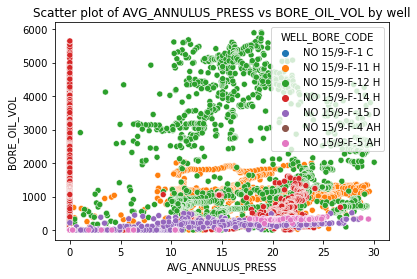

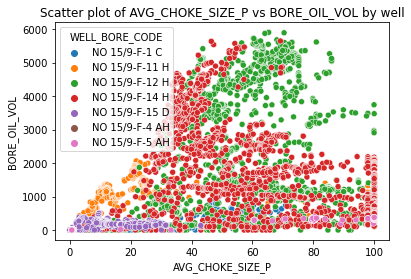

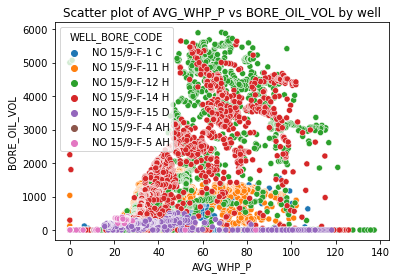

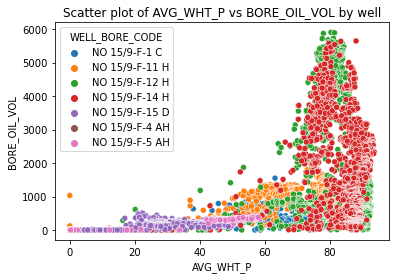

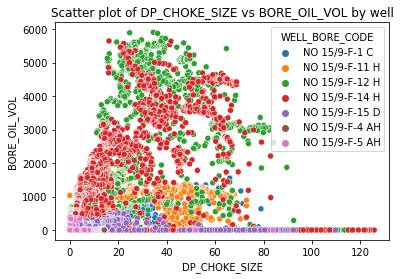

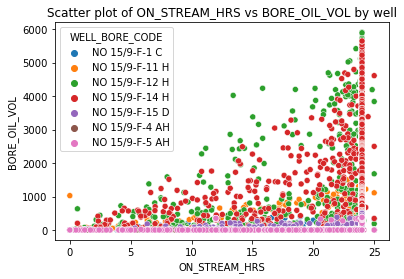

In [386]:
regression_columns = ['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',                      'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'ON_STREAM_HRS']
target_column = 'BORE_OIL_VOL'

for column in regression_columns:
    sns.scatterplot(x=column, y=target_column, hue='WELL_BORE_CODE', data=df)
    plt.title(f'Scatter plot of {column} vs {target_column} by well')
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.show()

Even Though the above gives us very detailed view of the optimum conditions but majority of data is being covered by only two wells the red and green and over the longest period of times
so by selecting recent years from 2014 to 2016 where the changes were noticible it becomes more resonable to draw info from this visualisations 
for this reason the visualisations area as follows

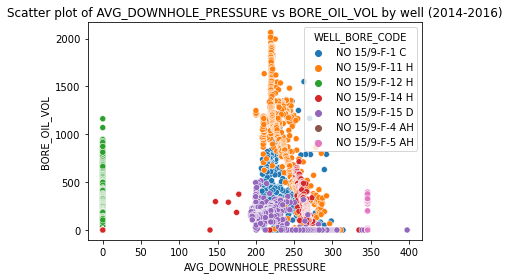

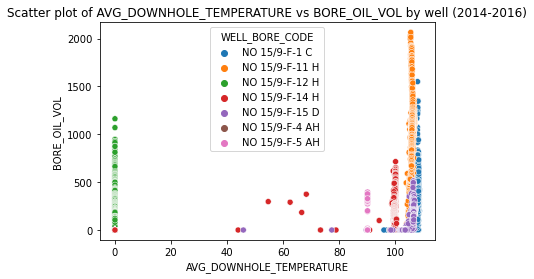

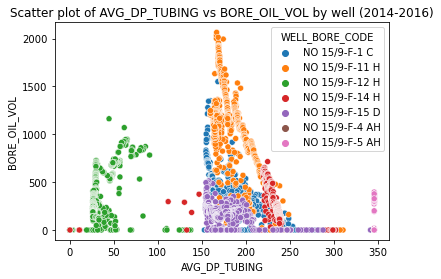

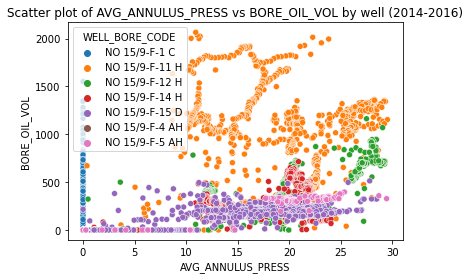

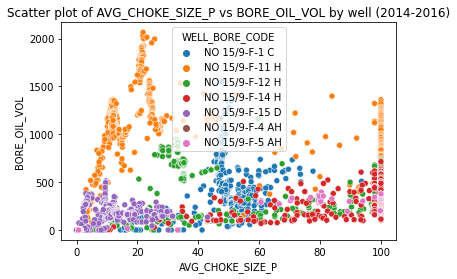

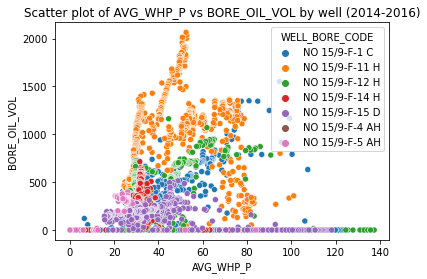

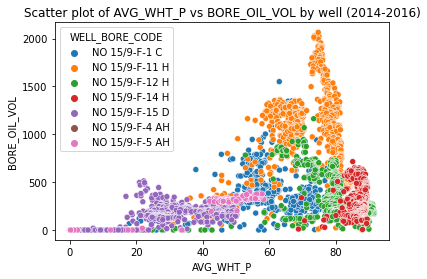

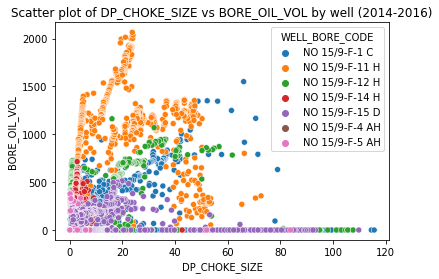

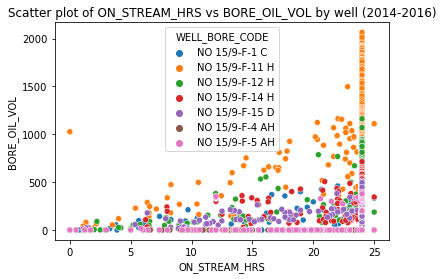

In [387]:
# Filtering the data to include only years 2014 to 2016
df_filtered = df[(df['DATEPRD'].dt.year >= 2014) & (df['DATEPRD'].dt.year <= 2016)]

regression_columns = ['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'ON_STREAM_HRS']
target_column = 'BORE_OIL_VOL'

for column in regression_columns:
    sns.scatterplot(x=column, y=target_column, hue='WELL_BORE_CODE', data=df_filtered)
    plt.title(f'Scatter plot of {column} vs {target_column} by well (2014-2016)')
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.show()

**The analysis helped identify significant producers and wells at risk of becoming dry. The team can prioritize interventions and remedial actions for wells at risk to improve their production performance. Such interventions may include well stimulation, workovers, or even drilling new wells in the same reservoir.**

**The team should also pay attention to geological and operational factors, such as reservoir properties, well types, well completion, and flow kind. While these factors may not have shown a strong influence in the current analysis, they could still play a crucial role in the production performance of the wells. Conducting a more comprehensive reservoir simulation and production optimization analysis may help identify additional opportunities for improvement.**
